In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import scipy.io as sio
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [2]:
# load file

file_name = 'Data20-03_TT_PrimVag_Cut'

data = sio.loadmat(r"C:\pyDocs\gitRepos\STNN\Data20-03_TT_PrimVag_Cut")

data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Baseline', 'RotDamage10e7', 'RotDamage10e9'])

In [3]:
# Collect data from each key into a list of DataFrames with added 'data_key' column
dataframes = []
for key in ['Baseline', 'RotDamage10e7', 'RotDamage10e9']:
  try:
    df = pd.DataFrame(data[key])
    # Add a column named 'data_key' with the current key value
    df['data_key'] = key
    dataframes.append(df)
    print(f"Successfully created dataframe from key: {key}")
  except ValueError:
    print(f"Error converting data from key: {key}")

# Check if any dataframes were created
if dataframes:
  # Concatenate the DataFrames (assuming similar structures)
  df_consolidated = pd.concat(dataframes, ignore_index=True)

  # One-hot encode the 'data_key' column
  encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
  encoded_data = encoder.fit_transform(df_consolidated[['data_key']])  # Exclude first column (represents original key)
  new_columns = encoder.get_feature_names_out(['data_key'])  # Get column names for encoded features

  # Add the one-hot encoded columns to the consolidated dataframe
  df_consolidated = pd.concat([df_consolidated, pd.DataFrame(encoded_data, columns=new_columns)], axis=1)

  # Print information about the consolidated dataframe
  print(df_consolidated.head())
  print(df_consolidated.shape)
else:
  print("No dataframes were successfully created from the provided keys.")

Successfully created dataframe from key: Baseline
Successfully created dataframe from key: RotDamage10e7
Successfully created dataframe from key: RotDamage10e9
          0         1         2         3         4         5         6  \
0  0.143397  0.142349  0.141791  0.142515  0.143240  0.145924  0.148971   
1  0.115996  0.114755  0.114354  0.119704  0.125054  0.125926  0.125354   
2  0.118341  0.123169  0.118386  0.110252  0.117875  0.128562  0.130297   
3  0.129514  0.132034  0.132429  0.132197  0.132581  0.134136  0.135691   
4  0.131906  0.135512  0.138052  0.139627  0.141213  0.142832  0.144451   

          7         8         9  ...      5824      5825      5826      5827  \
0  0.157490  0.173879  0.190268  ... -0.041470 -0.049992 -0.057736 -0.065480   
1  0.128809  0.138690  0.148494  ... -0.079686 -0.089151 -0.099758 -0.110598   
2  0.131530  0.137611  0.143817  ... -0.137550 -0.144997 -0.151475 -0.154377   
3  0.138072  0.140529  0.145766  ... -0.062292 -0.070559 -0.079027 -0

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
dados = df_consolidated.drop('data_key', axis=1)  # Specify axis=1 for columns

In [5]:
# rename with generic labels
label_dict = {'data_key_Baseline': 'y_0',
                 'data_key_RotDamage10e7': 'y_1',  
                 'data_key_RotDamage10e9': 'y_2'
                 }

dados = dados.rename(columns=label_dict)

In [7]:
# Selecting only the columns 'y_0' to 'y_5' and summing their values
selected_columns = [f'y_{i}' for i in range(3)]  # Create a list of the column names from 'y_0' to 'y_5'
counts = dados[selected_columns].sum()  # Sum only the selected columns

print(counts)

y_0    1000.0
y_1    1000.0
y_2    1000.0
dtype: float64


In [6]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,5823,5824,5825,5826,5827,5828,5829,y_0,y_1,y_2
0,0.143397,0.142349,0.141791,0.142515,0.143240,0.145924,0.148971,0.157490,0.173879,0.190268,...,-0.032684,-0.041470,-0.049992,-0.057736,-0.065480,-0.073572,-0.081741,1.0,0.0,0.0
1,0.115996,0.114755,0.114354,0.119704,0.125054,0.125926,0.125354,0.128809,0.138690,0.148494,...,-0.070221,-0.079686,-0.089151,-0.099758,-0.110598,-0.116321,-0.116035,1.0,0.0,0.0
2,0.118341,0.123169,0.118386,0.110252,0.117875,0.128562,0.130297,0.131530,0.137611,0.143817,...,-0.128936,-0.137550,-0.144997,-0.151475,-0.154377,-0.155287,-0.156193,1.0,0.0,0.0
3,0.129514,0.132034,0.132429,0.132197,0.132581,0.134136,0.135691,0.138072,0.140529,0.145766,...,-0.054179,-0.062292,-0.070559,-0.079027,-0.088569,-0.098112,-0.103183,1.0,0.0,0.0
4,0.131906,0.135512,0.138052,0.139627,0.141213,0.142832,0.144451,0.150528,0.156835,0.159769,...,-0.054677,-0.065566,-0.074435,-0.081444,-0.087267,-0.089194,-0.091121,1.0,0.0,0.0


In [7]:
# Separate the data based on the classes
y_0_data = dados[dados['y_0'] == 1]
y_1_data = dados[dados['y_1'] == 1]
y_2_data = dados[dados['y_2'] == 1]

# Shuffle the instances within each class
y_0_data = y_0_data.sample(frac=1, random_state=42)
y_1_data = y_1_data.sample(frac=1, random_state=42)
y_2_data = y_2_data.sample(frac=1, random_state=42)

# Select 100 instances of each class for the testing dataset
y_0_test = y_0_data.iloc[:100]
y_1_test = y_1_data.iloc[:100]
y_2_test = y_2_data.iloc[:100]

# Concatenate the testing data from all classes
test_data = pd.concat([y_0_test, y_1_test, y_2_test])

# Remove the one hot encoding columns to get the testing features and labels
X_test = test_data.drop(['y_0', 'y_1', 'y_2'], axis=1)
y_test = test_data[['y_0', 'y_1', 'y_2']]

In [8]:
from sklearn.model_selection import train_test_split
# Now, use the remaining data for training and validation
remaining_data = dados.drop(test_data.index)

# Split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    remaining_data.drop(['y_0', 'y_1', 'y_2'], axis=1),
    remaining_data[['y_0', 'y_1', 'y_2']],
    test_size=0.2,  # You can adjust the validation set size as needed
    random_state=42
)

In [9]:
print(y_train)

      y_0  y_1  y_2
2552  0.0  0.0  1.0
1596  0.0  1.0  0.0
2491  0.0  0.0  1.0
2102  0.0  0.0  1.0
2850  0.0  0.0  1.0
...   ...  ...  ...
1822  0.0  1.0  0.0
1216  0.0  1.0  0.0
1254  0.0  1.0  0.0
1438  0.0  1.0  0.0
956   1.0  0.0  0.0

[2160 rows x 3 columns]


In [10]:
import tensorflow as tf

num_spatial_features = 5830
num_classes = 3

def spatial_transformer_model(input_shape, num_spatial_features, num_classes):
    inputs = tf.keras.Input(shape=input_shape)
    
    # Localization network to predict transformation parameters
    loc_net = tf.keras.layers.Dense(num_spatial_features * 2, activation='relu')(inputs)
    
    # Reshape loc_net output to spatial transformation parameters
    theta = tf.keras.layers.Reshape((num_spatial_features, 2))(loc_net)
    
    # Generate grid transformation for 1D input
    def apply_transformation(x):
        x_input, theta_input = x
        x_input = tf.expand_dims(x_input, axis=-1)  # Add channel dimension for compatibility
        
        # Transpose theta_input before matrix multiplication
        
        transformed = tf.matmul(tf.transpose(theta_input, perm=[0, 2, 1]), x_input)
        
        return tf.squeeze(transformed, axis=-1)  # Remove added dimension
    
    transformed_input = tf.keras.layers.Lambda(apply_transformation)([inputs, theta])

    # Spatial Transformer Encoder
    spatial_encoder = tf.keras.layers.Dense(512, activation='relu')(transformed_input)
    spatial_encoder = tf.keras.layers.Dense(256, activation='relu')(spatial_encoder)
    
    # Output layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(spatial_encoder)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define the input shape and number of spatial features
input_shape = (5830)

# Create an instance of the Spatial Transformer model
model = spatial_transformer_model(input_shape, num_spatial_features, num_classes)

# Compile the model with a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
68/68 [==============================] - 59s 849ms/step - loss: 1.8116 - accuracy: 0.4949 - val_loss: 0.4767 - val_accuracy: 0.7000
Epoch 2/100
68/68 [==============================] - 53s 779ms/step - loss: 0.5010 - accuracy: 0.7042 - val_loss: 0.4070 - val_accuracy: 0.8093
Epoch 3/100
68/68 [==============================] - 52s 765ms/step - loss: 0.5035 - accuracy: 0.7130 - val_loss: 0.4158 - val_accuracy: 0.7796
Epoch 4/100
68/68 [==============================] - 52s 769ms/step - loss: 0.5409 - accuracy: 0.7023 - val_loss: 0.4295 - val_accuracy: 0.7259
Epoch 5/100
68/68 [==============================] - 52s 766ms/step - loss: 0.4528 - accuracy: 0.7556 - val_loss: 0.3548 - val_accuracy: 0.8000
Epoch 6/100
68/68 [==============================] - 51s 753ms/step - loss: 0.4788 - accuracy: 0.7477 - val_loss: 0.4733 - val_accuracy: 0.6889
Epoch 7/100
68/68 [==============================] - 52s 772ms/step - loss: 0.4541 - accuracy: 0.7551 - val_loss: 0.3893 - val_accuracy:

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = model.predict(X_test)

10/10 [==============================] - 1s 66ms/step


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained and obtained predictions
y_test_pred = model.predict(X_test)

10/10 [==============================] - 1s 70ms/step


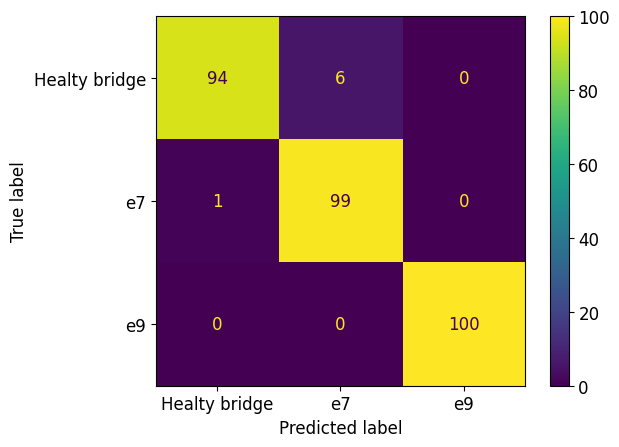

In [13]:
import matplotlib.pyplot as plt

# Convert predictions to class labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Convert ground truth labels to class labels
y_test_labels = np.argmax(y_test.values, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healty bridge', 'e7', 'e9'])

# Set the font size for the plot
plt.rcParams['font.size'] = 12

# Plot the confusion matrix
cm_display.plot()
plt.savefig('confusion_matrix.png')
# Show the plot
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = np.argmax(y_test.values, axis=1)

accuracy = accuracy_score(y_test_true_labels, y_test_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9767


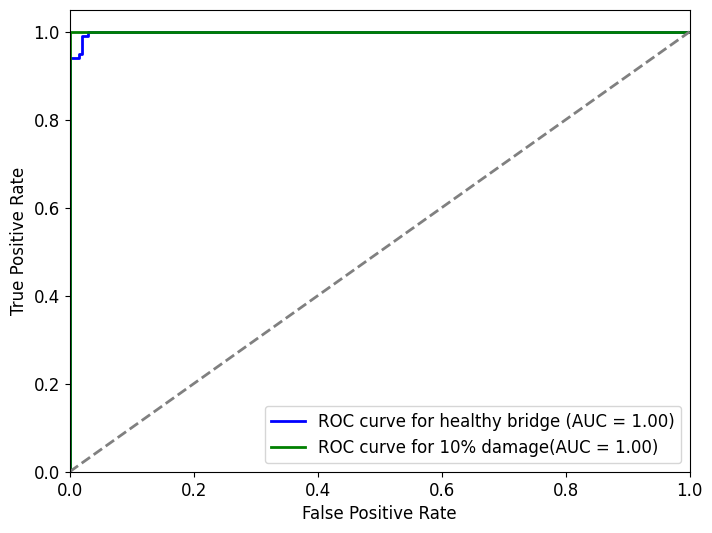

In [15]:
from sklearn.metrics import roc_curve, auc

# Extract the predicted probabilities for class y_0
y_0_prob = ytestpred[:, 0]  # Assuming class y_0 is the first class

# Extract the predicted probabilities for class y_2
y_2_prob = ytestpred[:, 2]  # Assuming class y_2 is the third class

# Assuming you have true labels y_test for all classes in y_test
# y_test should be a pandas DataFrame with shape (n_samples, n_classes)
# It contains the true labels for all data points in the test set.

# Step 2: Compute ROC curve for y_0
fpr_y_0, tpr_y_0, _ = roc_curve(y_test['y_0'], y_0_prob)
roc_auc_y_0 = auc(fpr_y_0, tpr_y_0)

# Step 3: Compute ROC curve for y_2
fpr_y_2, tpr_y_2, _ = roc_curve(y_test['y_2'], y_2_prob)
roc_auc_y_2 = auc(fpr_y_2, tpr_y_2)

plt.rcParams['font.size'] = 12

# Step 4: Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_y_0, tpr_y_0, color='b', lw=2, label='ROC curve for healthy bridge (AUC = %0.2f)' % roc_auc_y_0)
plt.plot(fpr_y_2, tpr_y_2, color='g', lw=2, label='ROC curve for 10%% damage(AUC = %0.2f)' % roc_auc_y_2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_y0_y2.png')
plt.show()

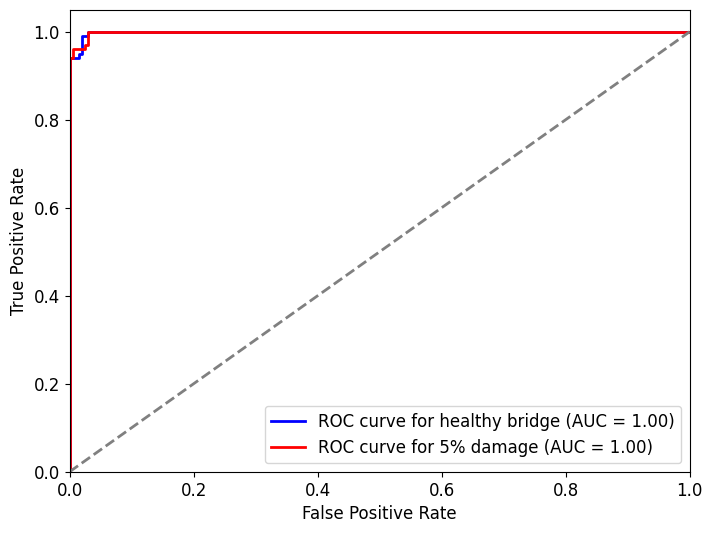

In [16]:
# Extract the predicted probabilities for class y_1
y_1_prob = ytestpred[:, 1]  # Assuming class y_1 is the second class

# Assuming you have true labels y_test for all classes in y_test
# y_test should be a pandas DataFrame with shape (n_samples, n_classes)
# It contains the true labels for all data points in the test set.

# Step 2: Compute ROC curve for y_0
fpr_y_0, tpr_y_0, _ = roc_curve(y_test['y_0'], y_0_prob)
roc_auc_y_0 = auc(fpr_y_0, tpr_y_0)

# Step 3: Compute ROC curve for y_1
fpr_y_1, tpr_y_1, _ = roc_curve(y_test['y_1'], y_1_prob)
roc_auc_y_1 = auc(fpr_y_1, tpr_y_1)

plt.rcParams['font.size'] = 12

# Step 4: Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_y_0, tpr_y_0, color='b', lw=2, label='ROC curve for healthy bridge (AUC = %0.2f)' % roc_auc_y_0)
plt.plot(fpr_y_1, tpr_y_1, color='r', lw=2, label='ROC curve for 5%% damage (AUC = %0.2f)' % roc_auc_y_1)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig('roc_y0_y1.png')
plt.show()

In [17]:
data = pd.DataFrame(remaining_data)

baseline_data = data[data["y_0"] == 1].sample(n=100, replace=True, random_state=42).copy()
damage_5_percent_data = data[data["y_1"] == 1].sample(n=100, replace=True, random_state=42).copy()
damage_10_percent_data = data[data["y_2"] == 1].sample(n=100, replace=True, random_state=42).copy()

print(baseline_data.describe())

                0           1           2           3           4           5  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.119450    0.120889    0.123250    0.126369    0.129643    0.133021   
std      0.014614    0.014379    0.014207    0.014299    0.014359    0.015061   
min      0.087581    0.092591    0.094612    0.096520    0.099263    0.101960   
25%      0.109722    0.110571    0.113336    0.116711    0.119167    0.121810   
50%      0.119992    0.121743    0.121187    0.124861    0.128042    0.131454   
75%      0.128839    0.129860    0.133574    0.136247    0.139211    0.142814   
max      0.157658    0.156238    0.157010    0.161808    0.166946    0.171064   

                6           7           8           9  ...        5823  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean     0.136499    0.140290    0.143658    0.147287  ...   -0.075787   
std      0.015696    0.015617    0.014712    0.0

In [18]:
class_names = ['Healty bridge', 'e7', 'e9']

# Remove the specified columns if they exist
baseline_data.drop(columns=class_names, inplace=True, errors='ignore')
damage_5_percent_data.drop(columns=class_names, inplace=True, errors='ignore')
damage_10_percent_data.drop(columns=class_names, inplace=True, errors='ignore')

damage_5_percent_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,5823,5824,5825,5826,5827,5828,5829,y_0,y_1,y_2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0
mean,0.119790,0.121114,0.123722,0.127207,0.130851,0.133600,0.135661,0.138273,0.141916,0.146336,...,-0.073768,-0.081460,-0.088820,-0.095844,-0.102696,-0.109244,-0.115903,0.0,1.0,0.0
std,0.013497,0.013333,0.013898,0.014666,0.015037,0.015444,0.015619,0.015023,0.014639,0.014755,...,0.029404,0.029163,0.028068,0.026903,0.025474,0.023549,0.022058,0.0,0.0,0.0
min,0.088600,0.090246,0.091955,0.090629,0.085317,0.091124,0.097712,0.104319,0.113712,0.116946,...,-0.143449,-0.150061,-0.146613,-0.150899,-0.160591,-0.166575,-0.161511,0.0,1.0,0.0
25%,0.107618,0.110472,0.114098,0.116137,0.121199,0.120323,0.122595,0.126522,0.128881,0.134157,...,-0.094184,-0.101577,-0.109222,-0.116088,-0.123686,-0.127419,-0.132125,0.0,1.0,0.0
50%,0.122071,0.123550,0.126795,0.128856,0.132840,0.134877,0.138019,0.139838,0.142887,0.146003,...,-0.068463,-0.077522,-0.083494,-0.090210,-0.097521,-0.106796,-0.113775,0.0,1.0,0.0
75%,0.127305,0.129451,0.132731,0.137502,0.141232,0.144920,0.148471,0.150188,0.153516,0.157432,...,-0.051805,-0.061341,-0.068303,-0.076573,-0.084720,-0.091265,-0.098821,0.0,1.0,0.0
max,0.145689,0.150262,0.154727,0.159632,0.162594,0.160232,0.168605,0.166384,0.176702,0.180384,...,-0.010829,-0.015485,-0.025528,-0.035607,-0.046599,-0.058406,-0.069561,0.0,1.0,0.0
